In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# --- Parameters ---
pages = 30  # number of pages to scrape
headers = {'User-Agent': 'Mozilla/5.0'}
base_url = "https://www.karkidi.com/Find-Jobs/{}/all/India"  # no search term filtering
jobs_list = []

# --- Scraping Loop ---
for page in range(1, pages + 1):
    url = base_url.format(page)
    print(f"Scraping page: {page} -> {url}")
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")
    job_blocks = soup.find_all("div", class_="ads-details")

    for job in job_blocks:
        try:
            title = job.find("h4").get_text(strip=True)
            company = job.find("a", href=lambda x: x and "Employer-Profile" in x).get_text(strip=True)
            location = job.find("p").get_text(strip=True)
            key_skills_tag = job.find("span", string="Key Skills")
            skills = key_skills_tag.find_next("p").get_text(strip=True) if key_skills_tag else ""
            jobs_list.append({
                "Title": title,
                "Company": company,
                "Location": location,
                "Skills": skills
            })
        except Exception as e:
            print("Parsing error:", e)

    time.sleep(1)  # Be nice to the server

# --- Convert to DataFrame ---
df = pd.DataFrame(jobs_list)

# --- Show the DataFrame ---
print(df)


Scraping page: 1 -> https://www.karkidi.com/Find-Jobs/1/all/India
Scraping page: 2 -> https://www.karkidi.com/Find-Jobs/2/all/India
Scraping page: 3 -> https://www.karkidi.com/Find-Jobs/3/all/India
Scraping page: 4 -> https://www.karkidi.com/Find-Jobs/4/all/India
Scraping page: 5 -> https://www.karkidi.com/Find-Jobs/5/all/India
Scraping page: 6 -> https://www.karkidi.com/Find-Jobs/6/all/India
Scraping page: 7 -> https://www.karkidi.com/Find-Jobs/7/all/India
Scraping page: 8 -> https://www.karkidi.com/Find-Jobs/8/all/India
Scraping page: 9 -> https://www.karkidi.com/Find-Jobs/9/all/India
Scraping page: 10 -> https://www.karkidi.com/Find-Jobs/10/all/India
Scraping page: 11 -> https://www.karkidi.com/Find-Jobs/11/all/India
Scraping page: 12 -> https://www.karkidi.com/Find-Jobs/12/all/India
Scraping page: 13 -> https://www.karkidi.com/Find-Jobs/13/all/India
Scraping page: 14 -> https://www.karkidi.com/Find-Jobs/14/all/India
Scraping page: 15 -> https://www.karkidi.com/Find-Jobs/15/all/Indi

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd

# --- Step 1: TF-IDF Vectorization of Skills ---
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Skills'])

# --- Step 2: Hierarchical Clustering using Ward linkage ---
Z = linkage(X.toarray(), method='ward')  # You can also try 'average' or 'complete'

# --- Step 3: Find the optimal number of clusters using silhouette score ---
best_score = -1
best_k = None
best_labels = None

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

best_sil_score = -1
best_dbi_score = float('inf')  # lower is better
best_ch_score = -1

best_k_sil = None
best_k_dbi = None
best_k_ch = None

for k in range(2, 20):
    labels = fcluster(Z, k, criterion='maxclust')
    
    sil_score = silhouette_score(X, labels)
    dbi_score = davies_bouldin_score(X.toarray(), labels)
    ch_score = calinski_harabasz_score(X.toarray(), labels)
    
    print(f"k={k} => Silhouette: {sil_score:.4f}, DBI: {dbi_score:.4f}, CH: {ch_score:.4f}")
    
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_k_sil = k
    
    if dbi_score < best_dbi_score:
        best_dbi_score = dbi_score
        best_k_dbi = k
    
    if ch_score > best_ch_score:
        best_ch_score = ch_score
        best_k_ch = k

print("\nBest number of clusters according to each metric:")
print(f"Silhouette Score: k = {best_k_sil} (score = {best_sil_score:.4f})")
print(f"Davies-Bouldin Index: k = {best_k_dbi} (score = {best_dbi_score:.4f})")
print(f"Calinski-Harabasz Index: k = {best_k_ch} (score = {best_ch_score:.4f})")

k=2 => Silhouette: 0.3020, DBI: 1.7946, CH: 80.3345
k=3 => Silhouette: 0.4124, DBI: 1.4536, CH: 93.8399
k=4 => Silhouette: 0.5342, DBI: 1.1037, CH: 121.4056
k=5 => Silhouette: 0.6496, DBI: 0.8864, CH: 158.7771
k=6 => Silhouette: 0.7469, DBI: 0.6832, CH: 216.3286
k=7 => Silhouette: 0.8629, DBI: 0.5505, CH: 390.4256
k=8 => Silhouette: 0.9591, DBI: 0.1806, CH: 3037.3560
k=9 => Silhouette: 1.0000, DBI: 0.0000, CH: 98525285214903932266855123648512.0000
k=10 => Silhouette: 1.0000, DBI: 0.0000, CH: 98525285214903932266855123648512.0000
k=11 => Silhouette: 1.0000, DBI: 0.0000, CH: 98525285214903932266855123648512.0000
k=12 => Silhouette: 1.0000, DBI: 0.0000, CH: 98525285214903932266855123648512.0000
k=13 => Silhouette: 1.0000, DBI: 0.0000, CH: 98525285214903932266855123648512.0000
k=14 => Silhouette: 1.0000, DBI: 0.0000, CH: 98525285214903932266855123648512.0000
k=15 => Silhouette: 1.0000, DBI: 0.0000, CH: 98525285214903932266855123648512.0000
k=16 => Silhouette: 1.0000, DBI: 0.0000, CH: 98525

In [3]:
df['Cluster'] = fcluster(Z, 4, criterion='maxclust')

In [4]:
print(df['Cluster'].value_counts())
df["Title"].unique()

Cluster
1    120
4     60
2     60
3     60
Name: count, dtype: int64


array(['Principal Product Manager - Growth, Poe (Remote)',
       'Machine Learning Physical Design Engineer',
       'Staff Software Engineer - Monetization, Poe (Remote)',
       'Staff Backend Engineer - Bot Creator Ecosystem, Poe (Remote)',
       'Senior Backend Engineer - Bot Creator Ecosystem, Poe (Remote)',
       'Data Scientist Lead - AIML',
       'Applied AI ML Director - Machine Learning',
       'Senior Product Designer', 'Manager - Machine Learning',
       'Data Scientist'], dtype=object)

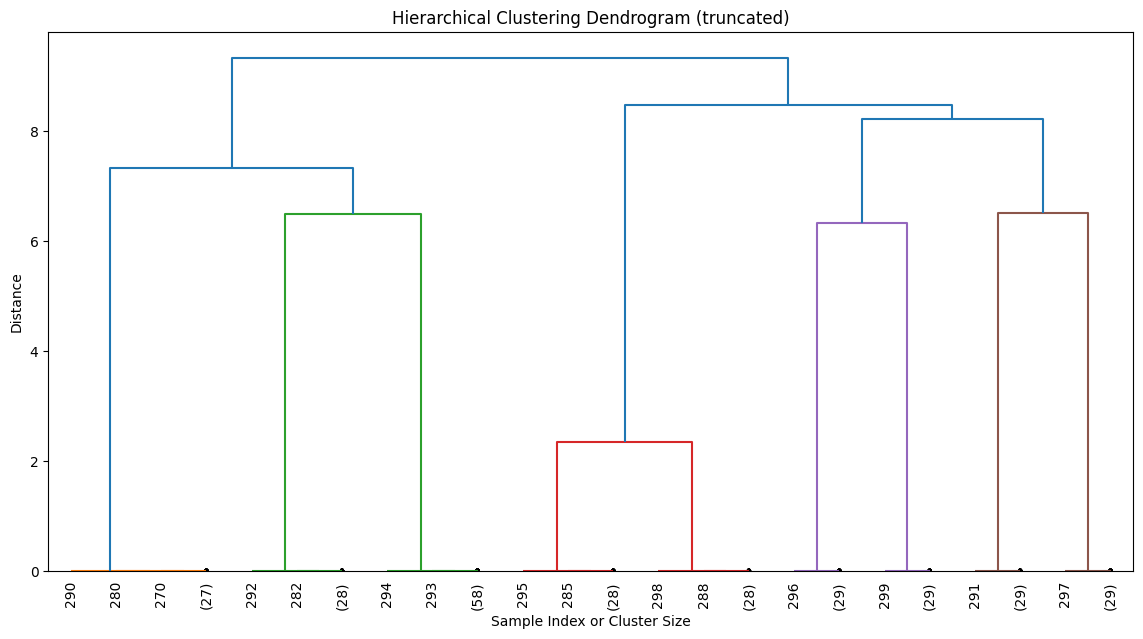

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(14, 7))
dendrogram(
    Z,
    truncate_mode='level',  # show only last p merged clusters for readability
    p=4,                   # number of levels to show; adjust as needed
    leaf_rotation=90.,      # rotate labels for better readability
    leaf_font_size=10.,
    show_contracted=True    # show large clusters as triangles
)

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

In [6]:
import numpy as np
import pandas as pd

# Number of top keywords per cluster
top_n = 10

# TF-IDF matrix and feature names
tfidf_matrix = X.toarray()  # your TF-IDF features from before
feature_names = vectorizer.get_feature_names_out()

# DataFrame with TF-IDF and cluster labels
tfidf_df = pd.DataFrame(tfidf_matrix)
tfidf_df['Cluster'] = df['Cluster'].values

# Function to get top keywords per cluster
def get_top_keywords(cluster_id):
    cluster_tfidf = tfidf_df[tfidf_df['Cluster'] == cluster_id].drop('Cluster', axis=1)
    mean_tfidf = cluster_tfidf.mean(axis=0)
    top_indices = mean_tfidf.values.argsort()[::-1][:top_n]
    return feature_names[top_indices]


# Summarize for each cluster
for cluster_id in sorted(df['Cluster'].unique()):
    keywords = get_top_keywords(cluster_id)
    print(f"Cluster {cluster_id} top keywords:")
    print(", ".join(keywords))
    print("-" * 40)

Cluster 1 top keywords:
communication, skills, effective, teamwork, api, data, python, programming, science, design
----------------------------------------
Cluster 2 top keywords:
language, processing, natural, nlp, learning, machine, techniques, large, llms, models
----------------------------------------
Cluster 3 top keywords:
google, cloud, platform, gcp, azure, k8s, kubernetes, aws, bigquery, redshift
----------------------------------------
Cluster 4 top keywords:
leadership, skill, learning, design, machine, structuring, algorithms, techniques, data, intelligence
----------------------------------------


In [7]:
for cluster_id in sorted(df['Cluster'].unique()):
    unique_titles = df[df['Cluster'] == cluster_id]['Title'].unique()
    print(f"Cluster {cluster_id} - Unique Job Roles ({len(unique_titles)}):")
    for title in unique_titles:
        print(f"  {title}")
    print("-" * 50)

Cluster 1 - Unique Job Roles (4):
  Principal Product Manager - Growth, Poe (Remote)
  Staff Software Engineer - Monetization, Poe (Remote)
  Staff Backend Engineer - Bot Creator Ecosystem, Poe (Remote)
  Senior Backend Engineer - Bot Creator Ecosystem, Poe (Remote)
--------------------------------------------------
Cluster 2 - Unique Job Roles (2):
  Data Scientist Lead - AIML
  Manager - Machine Learning
--------------------------------------------------
Cluster 3 - Unique Job Roles (2):
  Applied AI ML Director - Machine Learning
  Data Scientist
--------------------------------------------------
Cluster 4 - Unique Job Roles (2):
  Machine Learning Physical Design Engineer
  Senior Product Designer
--------------------------------------------------


In [8]:
import joblib

# Save vectorizer and linkage matrix
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(Z, 'linkage_matrix.pkl')

['linkage_matrix.pkl']